In [1]:
import warnings # Omitir mensajes de advertencia
warnings.filterwarnings("ignore")

In [2]:
# Trabajamos en colab:
from google.colab import drive
drive.mount('/content/drive/')

import os

path = '/content/drive/MyDrive/Colab Notebooks/' # Directorio de trabajo

os.chdir(path)

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
# %%capture
# !pip install pygrib
# !pip install cartopy
# !pip install basemap

In [4]:
import pygrib as pg

In [5]:
# Abrimos el archivo grib
# --------------------------------------------------------------
grbs = pg.open(path + 'Clase_8/todo.grb2')
grbs

In [6]:
# Revisamos las variables
# --------------------------------------------------------------
for grb in grbs:
  print(grb)

1:Pressure reduced to MSL:Pa (instant):regular_ll:meanSea:level 0:fcst time 0 hrs:from 202402061800
2:Cloud mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402061800
3:Ice water mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402061800
4:Rain mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402061800
5:Snow mixing ratio:kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402061800
6:Graupel (snow pellets):kg kg**-1 (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402061800
7:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 1:fcst time 0 hrs:from 202402061800
8:Derived radar reflectivity:dB (instant):regular_ll:hybrid:level 2:fcst time 0 hrs:from 202402061800
9:Maximum/Composite radar reflectivity:dB (instant):regular_ll:atmosphere:level 0 -:fcst time 0 hrs:from 202402061800
10:Visibility:m (instant):regular_ll:surface:level 0:fcst time 0 hr

# SELECCIÓN DE VARIABLES

In [7]:
# --------------------------------------------------------------
# Seleccionamos la variable temperatura
grbs.select(name='Temperature')

[16:Temperature:K (instant):regular_ll:isobaricInPa:level 1 Pa:fcst time 0 hrs:from 202402061800,
 26:Temperature:K (instant):regular_ll:isobaricInPa:level 2 Pa:fcst time 0 hrs:from 202402061800,
 36:Temperature:K (instant):regular_ll:isobaricInPa:level 4 Pa:fcst time 0 hrs:from 202402061800,
 46:Temperature:K (instant):regular_ll:isobaricInPa:level 7 Pa:fcst time 0 hrs:from 202402061800,
 56:Temperature:K (instant):regular_ll:isobaricInPa:level 10 Pa:fcst time 0 hrs:from 202402061800,
 66:Temperature:K (instant):regular_ll:isobaricInPa:level 20 Pa:fcst time 0 hrs:from 202402061800,
 76:Temperature:K (instant):regular_ll:isobaricInPa:level 40 Pa:fcst time 0 hrs:from 202402061800,
 86:Temperature:K (instant):regular_ll:isobaricInPa:level 70 Pa:fcst time 0 hrs:from 202402061800,
 96:Temperature:K (instant):regular_ll:isobaricInhPa:level 100 Pa:fcst time 0 hrs:from 202402061800,
 106:Temperature:K (instant):regular_ll:isobaricInhPa:level 200 Pa:fcst time 0 hrs:from 202402061800,
 116:Temp

In [8]:
# --------------------------------------------------------------
type(grbs.select(name='Temperature')) # Es de tipo lista

list

In [9]:
# --------------------------------------------------------------
# Seleccionamos el primer elemento de la lista de temperaturas
grbs.select(name='Temperature')[0]

16:Temperature:K (instant):regular_ll:isobaricInPa:level 1 Pa:fcst time 0 hrs:from 202402061800

In [10]:
# --------------------------------------------------------------
# Seleccionamos un rango de la lista de temperaturas
grbs.select(name='Temperature')[0:4]

[16:Temperature:K (instant):regular_ll:isobaricInPa:level 1 Pa:fcst time 0 hrs:from 202402061800,
 26:Temperature:K (instant):regular_ll:isobaricInPa:level 2 Pa:fcst time 0 hrs:from 202402061800,
 36:Temperature:K (instant):regular_ll:isobaricInPa:level 4 Pa:fcst time 0 hrs:from 202402061800,
 46:Temperature:K (instant):regular_ll:isobaricInPa:level 7 Pa:fcst time 0 hrs:from 202402061800]

In [11]:
# --------------------------------------------------------------
# Otra manera de seleccionar es a través de "message"
# Se coloca la posición deseada
grbs.message(16)

16:Temperature:K (instant):regular_ll:isobaricInPa:level 1 Pa:fcst time 0 hrs:from 202402061800

In [12]:
# # Los niveles están en Pascales, entonces para seleccionar el
# # Nivel adecuado, tendría que dividirlo entre 100; así, si quiero utilizar
# # El nivel de 700 hPa o mb, tendría que seleccionar el nivel 70000 Pa
# --------------------------------------------------------------
t = grbs.message(414) # temp a 700 mb, en el t 0
t

414:Temperature:K (instant):regular_ll:isobaricInhPa:level 70000 Pa:fcst time 0 hrs:from 202402061800

# EXPLORAMOS LA VARIABLE (t) TEMPERATURA

In [13]:
data_t = t.values
data_t

array([[253.81583984, 253.81583984, 253.81583984, ..., 253.81583984,
        253.81583984, 253.81583984],
       [254.37583984, 254.38583984, 254.39583984, ..., 254.35583984,
        254.36583984, 254.37583984],
       [254.76583984, 254.77583984, 254.78583984, ..., 254.74583984,
        254.75583984, 254.76583984],
       ...,
       [239.80583984, 239.81583984, 239.83583984, ..., 239.75583984,
        239.76583984, 239.78583984],
       [241.05583984, 241.04583984, 241.04583984, ..., 241.05583984,
        241.05583984, 241.05583984],
       [241.64583984, 241.64583984, 241.64583984, ..., 241.64583984,
        241.64583984, 241.64583984]])

In [14]:
data_t.shape, data_t.min(), data_t.max()

((361, 720), 227.55583984375, 295.44583984375)

In [15]:
lats, lons = t.latlons()
print(f'Latitudes:\n {lats}')
print('------------------------')
print(f'Longitudes:\n {lons}')

Latitudes:
 [[ 90.   90.   90.  ...  90.   90.   90. ]
 [ 89.5  89.5  89.5 ...  89.5  89.5  89.5]
 [ 89.   89.   89.  ...  89.   89.   89. ]
 ...
 [-89.  -89.  -89.  ... -89.  -89.  -89. ]
 [-89.5 -89.5 -89.5 ... -89.5 -89.5 -89.5]
 [-90.  -90.  -90.  ... -90.  -90.  -90. ]]
------------------------
Longitudes:
 [[  0.    0.5   1.  ... 358.5 359.  359.5]
 [  0.    0.5   1.  ... 358.5 359.  359.5]
 [  0.    0.5   1.  ... 358.5 359.  359.5]
 ...
 [  0.    0.5   1.  ... 358.5 359.  359.5]
 [  0.    0.5   1.  ... 358.5 359.  359.5]
 [  0.    0.5   1.  ... 358.5 359.  359.5]]


In [16]:
print('------------------------')
print(f'Latitudes:\n')
print(lats.shape, lats.min(), lats.max())
print('------------------------')
print(f'Longitudes:\n')
print(lons.shape, lons.min(), lons.max())
print('------------------------')

------------------------
Latitudes:

(361, 720) -90.0 90.0
------------------------
Longitudes:

(361, 720) 0.0 359.5
------------------------


# GRAFICAMOS CON BASEMAP

In [17]:
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt

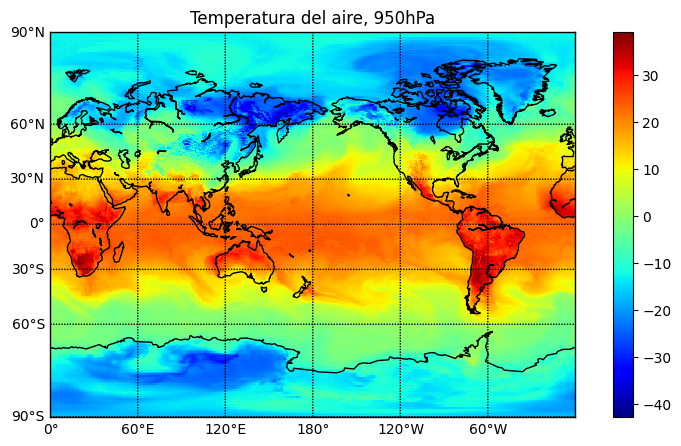

In [23]:
# 510:Temperature:K (instant):regular_ll:isobaricInhPa:level 95000 Pa:fcst time 0 hrs:from 202402061800,
plt.figure(figsize=(10,5))
grb = grbs.message(510)
# grb = grbs.message(11)
data = grb.values - 273.15 # len: 61
lats, lons = grb.latlons() # len: 61
m=Basemap(projection='mill', lat_ts=10, llcrnrlon=lons.min(),urcrnrlon=lons.max(),
          llcrnrlat=lats.min(),urcrnrlat=lats.max(), resolution='c')
x,y = m(lons, lats)
cs=m.pcolormesh(x, y, data, shading='nearest', cmap='jet')
# -----------------------
m.drawcoastlines()
# m.fillcontinents(color='gray', lake_color='aqua')
m.drawmapboundary(fill_color='aqua')
m.drawparallels(np.arange(-90,120,30),labels=[1,0,0,0])
m.drawmeridians(np.arange(-180,180,60),labels=[0,0,0,1])
plt.colorbar(cs, orientation = 'vertical')
plt.title('Temperatura del aire, 950hPa')
# -----------------------
plt.show()